In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
import numpy as np

In [2]:
df = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/after_EDA/stroke.csv')

In [3]:
df.head()

,CensusTract,Stroke_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,1001020200,3.7,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1001020400,3.0,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,1001021000,3.8,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,1003010905,2.9,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,1003010906,3.7,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [4]:
df.set_index('CensusTract', inplace=True)
df.head()


,Stroke_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,,
1001020200,3.7,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1001020400,3.0,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
1001021000,3.8,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
1003010905,2.9,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
1003010906,3.7,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


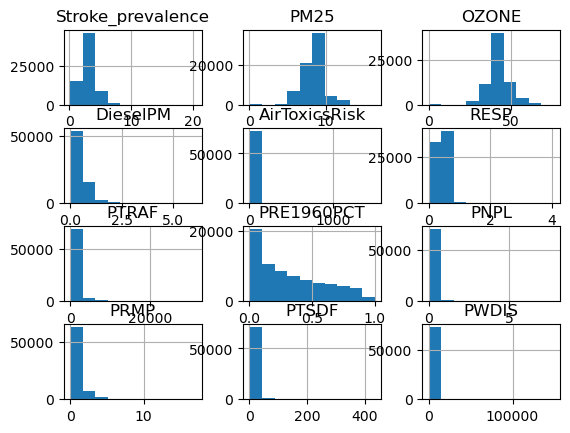

In [5]:
df.hist()
plt.show()

In [6]:
X = df.copy()
X.drop('Stroke_prevalence', axis=1, inplace=True)
y = df['Stroke_prevalence']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(54242, 11) (18081, 11) (54242,) (18081,)


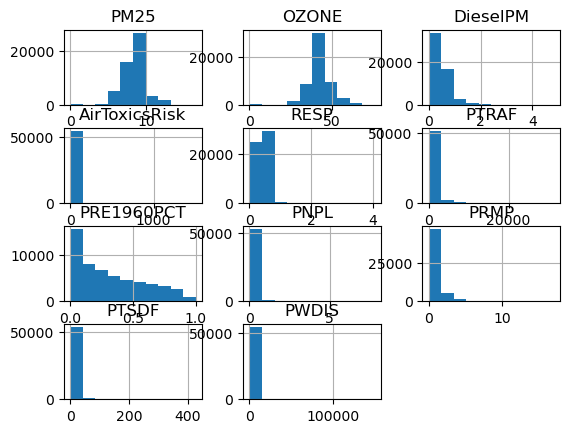

In [9]:
X_train.hist()
plt.show()

In [10]:
X_train.head()

,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
6065045116,7.660944,60.860335,0.137745,23.801921,0.273968,511.418765,0.045939,0.012137,8.007200,2.570145,0.000000
6071010020,9.200394,68.206665,0.228860,27.919917,0.358875,212.617647,0.064983,0.044896,0.123944,4.197502,0.000000
51013102702,8.795314,43.969795,1.038167,37.056995,0.547069,427.794151,0.247113,0.100311,0.135159,7.314805,0.003546
23031030300,6.117735,36.291889,0.160305,21.139852,0.256844,47.939003,0.164679,0.049373,0.078118,1.342834,0.000109
51570830300,8.228360,41.060503,0.293214,35.257927,0.446797,199.494336,0.125551,0.062721,0.269847,1.293875,0.000886


In [13]:
# Saving data without normalization
X_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_stroke')
X_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_stroke')
y_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_stroke')
y_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_stroke')

In [14]:
# Taking the log of the data in X_train that are not close to being normally distributed
X_train_log = X_train.copy()
pt = PowerTransformer()
pt.fit(X_train_log[['DieselPM']])
X_train_log['DieselPM'] = pt.transform(X_train_log[['DieselPM']])

pt1 = PowerTransformer()
pt1.fit(X_train_log[['AirToxicsRisk']])
X_train_log['AirToxicsRisk'] = pt1.transform(X_train_log[['AirToxicsRisk']])

pt2 = PowerTransformer()
pt2.fit(X_train_log[['RESP']])
X_train_log['RESP'] = pt2.transform(X_train_log[['RESP']]) 

pt3 = PowerTransformer()
pt3.fit(X_train_log[['PTRAF']])
X_train_log['PTRAF'] = pt3.transform(X_train_log[['PTRAF']])

pt4 = PowerTransformer()
pt4.fit(X_train_log[['PRE1960PCT']])
X_train_log['PRE1960PCT'] = pt4.transform(X_train_log[['PRE1960PCT']])

pt5 = PowerTransformer()
pt5.fit(X_train_log[['PNPL']])
X_train_log['PNPL'] = pt5.transform(X_train_log[['PNPL']])

pt6 = PowerTransformer()
pt6.fit(X_train_log[['PRMP']])
X_train_log['PRMP'] = pt6.transform(X_train_log[['PRMP']])

pt7 = PowerTransformer()
pt7.fit(X_train[['PTSDF']])
X_train['PTSDF'] = pt7.transform(X_train[['PTSDF']])

pt8 = PowerTransformer()
pt8.fit(X_train_log[['PWDIS']])
X_train_log['PWDIS'] = pt8.transform(X_train_log[['PWDIS']])

y_train_log = y_train.copy()
pt9 = PowerTransformer()
y_train_log = np.array(y_train_log)
y_train_log = y_train_log.reshape(-1,1)
pt9.fit(y_train_log)
y_train_log = pt9.transform(y_train_log)
y_train_log = np.ravel(y_train_log)

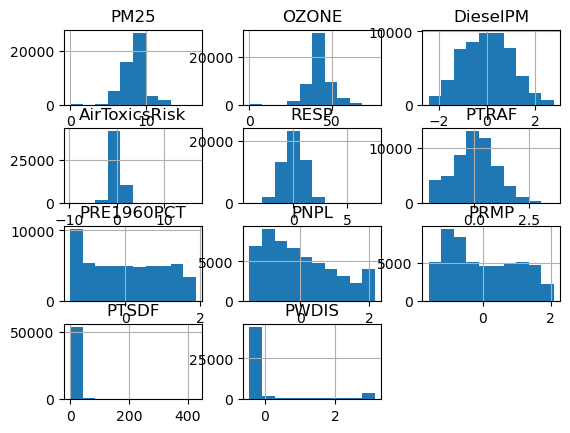

In [15]:
X_train_log.hist()
plt.show()

PWDIS should just be left out of the data because it is not normally distributed.

In [16]:
X_test_log = X_test.copy()

In [17]:
X_test_log.drop('PWDIS', axis=1, inplace=True)
X_train_log.drop('PWDIS', axis=1, inplace=True)

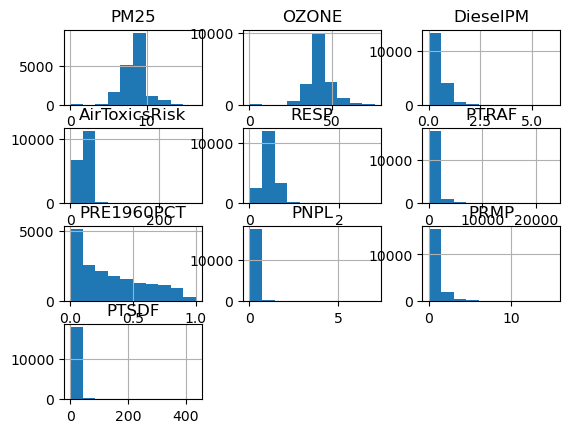

In [18]:
X_test_log.hist()
plt.show()

In [22]:
# Transforming the test data using the PowerTransformer that I fit on the train data
X_test_log['DieselPM'] = pt.transform(X_test_log[['DieselPM']])

X_test_log['AirToxicsRisk'] = pt1.transform(X_test_log[['AirToxicsRisk']])

X_test_log['RESP'] = pt2.transform(X_test_log[['RESP']]) 

X_test_log['PTRAF'] = pt3.transform(X_test_log[['PTRAF']])

X_test_log['PRE1960PCT'] = pt4.transform(X_test_log[['PRE1960PCT']])

X_test_log['PNPL'] = pt5.transform(X_test_log[['PNPL']])

X_test_log['PRMP'] = pt6.transform(X_test_log[['PRMP']])

X_test_log['PTSDF'] = pt7.transform(X_test_log[['PTSDF']])


y_test_log = y_test.copy()
y_test_log = np.array(y_test_log)
y_test_log = y_test_log.reshape(-1,1)
y_test_log = pt9.transform(y_test_log)
y_test_log = y_test_log.reshape(18081,)

print(X_train_log.shape, y_train_log.shape, X_test_log.shape, y_test_log.shape)

(54242, 10) (54242,) (18081, 10) (18081,)


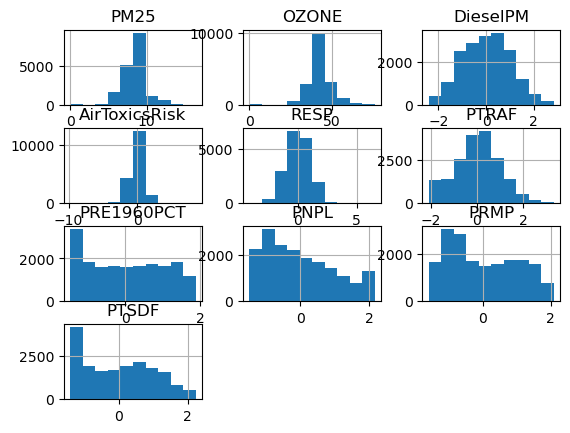

In [20]:
X_test_log.hist()
plt.show()

Stroke data should now be ready to model

In [21]:
X_test_log.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_log_stroke')
X_train_log.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_log_stroke')

y_test_log = pd.Series(y_test)

y_train_log = pd.Series(y_train)
y_test_log.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_log_stroke')
y_train_log.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_log_stroke')